In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt 

In [3]:

import sys
sys.path.append('../')
import pandas as pd 
import numpy as np 

import datetime
from src.utils.io.read import RawDataReader
from src.settings import Settings
from src.utils.dates import get_nyse_business_dates
from src.utils.dates import count_business_days_series

In [4]:
from src.preprocessing.index_roll_dates import get_index_roll_dates 

In [5]:
wti_prices_panel = pd.read_csv(Settings.backfill.paths.PREPROCESSED_DATA_PATH / 'wti_prices_panel.csv')

In [6]:
wti_prices_panel['tradeDate'] = pd.to_datetime(wti_prices_panel['tradeDate'], errors='coerce').dt.date

In [7]:
business_dates = get_nyse_business_dates(wti_prices_panel['tradeDate'].min(),
                        wti_prices_panel['tradeDate'].max())

In [8]:
index_roll_dates_df = get_index_roll_dates(start_date = wti_prices_panel['tradeDate'].min(),
                    end_date = wti_prices_panel['tradeDate'].max(),
                    roll_start_day  = 5,
                    roll_end_day  = 9) 

In [9]:
index_roll_dates_df.isna().sum()

month                       0
current_roll_start_date     0
current_roll_end_date       0
previous_roll_start_date    0
previous_roll_end_date      0
next_roll_start_date        0
next_roll_end_date          0
dtype: int64

In [10]:
index_roll_dates_df.tail(5)

,month,current_roll_start_date,current_roll_end_date,previous_roll_start_date,previous_roll_end_date,next_roll_start_date,next_roll_end_date
182,2025-03,2025-03-07,2025-03-13,2025-02-07,2025-02-13,2025-04-07,2025-04-11
183,2025-04,2025-04-07,2025-04-11,2025-03-07,2025-03-13,2025-05-07,2025-05-13
184,2025-05,2025-05-07,2025-05-13,2025-04-07,2025-04-11,2025-06-06,2025-06-12
185,2025-06,2025-06-06,2025-06-12,2025-05-07,2025-05-13,2025-07-08,2025-07-14
186,2025-07,2025-07-08,2025-07-14,2025-06-06,2025-06-12,2025-08-07,2025-08-13


In [11]:
index_roll_dates_df

,month,current_roll_start_date,current_roll_end_date,previous_roll_start_date,previous_roll_end_date,next_roll_start_date,next_roll_end_date
0,2010-01,2010-01-08,2010-01-14,2009-12-07,2009-12-11,2010-02-05,2010-02-11
1,2010-02,2010-02-05,2010-02-11,2010-01-08,2010-01-14,2010-03-05,2010-03-11
2,2010-03,2010-03-05,2010-03-11,2010-02-05,2010-02-11,2010-04-08,2010-04-14
3,2010-04,2010-04-08,2010-04-14,2010-03-05,2010-03-11,2010-05-07,2010-05-13
4,2010-05,2010-05-07,2010-05-13,2010-04-08,2010-04-14,2010-06-07,2010-06-11
...,...,...,...,...,...,...,...
182,2025-03,2025-03-07,2025-03-13,2025-02-07,2025-02-13,2025-04-07,2025-04-11
183,2025-04,2025-04-07,2025-04-11,2025-03-07,2025-03-13,2025-05-07,2025-05-13
184,2025-05,2025-05-07,2025-05-13,2025-04-07,2025-04-11,2025-06-06,2025-06-12
185,2025-06,2025-06-06,2025-06-12,2025-05-07,2025-05-13,2025-07-08,2025-07-14


# Days to next roll start 
If tradeDate is on or before current_roll_start_date:
    days_to_next_roll_start = current_roll_start_date minus tradeDate

Else if tradeDate is between current_roll_start_date and current_roll_end_date:
    days_to_next_roll_start = 0

Else if tradeDate is after current_roll_end_date:
    days_to_next_roll_start = next_roll_start_date minus tradeDate

# Days since last roll end 
If tradeDate is on or after current_roll_end_date:
    days_since_last_roll_end = tradeDate minus current_roll_end_date

Else if tradeDate is between current_roll_start_date and current_roll_end_date:
    days_since_last_roll_end = 0

Else if tradeDate is before current_roll_start_date:
    days_since_last_roll_end = tradeDate minus previous_roll_end_date

In [12]:
dataset = pd.merge(wti_prices_panel,
                   index_roll_dates_df,
                   on = 'month',
                   how ='left')

In [13]:
index_roll_dates_df.tail(3)

,month,current_roll_start_date,current_roll_end_date,previous_roll_start_date,previous_roll_end_date,next_roll_start_date,next_roll_end_date
184,2025-05,2025-05-07,2025-05-13,2025-04-07,2025-04-11,2025-06-06,2025-06-12
185,2025-06,2025-06-06,2025-06-12,2025-05-07,2025-05-13,2025-07-08,2025-07-14
186,2025-07,2025-07-08,2025-07-14,2025-06-06,2025-06-12,2025-08-07,2025-08-13


In [14]:
dataset

,Unnamed: 0,tradeDate,Name,F1_Price,F2_Price,F3_Price,F1_RolledPrice,F2_RolledPrice,F3_RolledPrice,month,...,forward_16D_F1MinusF2_RolledPrice_change,forward_17D_F1MinusF2_RolledPrice_change,forward_18D_F1MinusF2_RolledPrice_change,forward_19D_F1MinusF2_RolledPrice_change,current_roll_start_date,current_roll_end_date,previous_roll_start_date,previous_roll_end_date,next_roll_start_date,next_roll_end_date
0,0,2010-01-04,CL,81.51,82.12,82.65,105.35,87.74,73.86,2010-01,...,0.36,0.41,0.38,0.36,2010-01-08,2010-01-14,2009-12-07,2009-12-11,2010-02-05,2010-02-11
1,1,2010-01-05,CL,81.77,82.41,82.99,105.61,88.03,74.20,2010-01,...,0.44,0.41,0.39,0.38,2010-01-08,2010-01-14,2009-12-07,2009-12-11,2010-02-05,2010-02-11
2,2,2010-01-06,CL,83.18,83.75,84.31,107.02,89.37,75.52,2010-01,...,0.34,0.32,0.31,0.35,2010-01-08,2010-01-14,2009-12-07,2009-12-11,2010-02-05,2010-02-11
3,3,2010-01-07,CL,82.66,83.19,83.75,106.50,88.81,74.96,2010-01,...,0.28,0.27,0.31,0.36,2010-01-08,2010-01-14,2009-12-07,2009-12-11,2010-02-05,2010-02-11
4,4,2010-01-08,CL,82.75,83.30,83.87,106.59,88.92,75.08,2010-01,...,0.29,0.33,0.38,0.45,2010-01-08,2010-01-14,2009-12-07,2009-12-11,2010-02-05,2010-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,3907,2025-06-30,CL,65.11,63.85,62.76,65.11,63.85,62.76,2025-06,...,NaN,NaN,NaN,NaN,2025-06-06,2025-06-12,2025-05-07,2025-05-13,2025-07-08,2025-07-14
3897,3908,2025-07-01,CL,65.45,64.15,63.07,65.45,64.15,63.07,2025-07,...,NaN,NaN,NaN,NaN,2025-07-08,2025-07-14,2025-06-06,2025-06-12,2025-08-07,2025-08-13
3898,3909,2025-07-02,CL,67.45,66.01,64.73,67.45,66.01,64.73,2025-07,...,NaN,NaN,NaN,NaN,2025-07-08,2025-07-14,2025-06-06,2025-06-12,2025-08-07,2025-08-13
3899,3910,2025-07-03,CL,67.00,65.62,64.40,67.00,65.62,64.40,2025-07,...,NaN,NaN,NaN,NaN,2025-07-08,2025-07-14,2025-06-06,2025-06-12,2025-08-07,2025-08-13


In [15]:
dataset = dataset[dataset['tradeDate'].isin(business_dates)]

In [16]:
test_start_dates = [datetime.date(2025,6,1), datetime.date(2025,6,15)] 
test_end_dates = [datetime.date(2025,6,1), datetime.date(2025,6,15)] 

In [17]:
count_business_days_series(start_dates = pd.Series(test_start_dates), 
                        end_dates = pd.Series(test_end_dates), 
                        business_days = pd.Series(business_dates)).values

array([0, 0])

In [18]:
len(business_dates)

3900

In [19]:
def add_roll_recency_information(dataset):
    """
    Add days_to_next_roll_start and days_since_last_roll_end columns to dataset.
    
    Assumes dataset has columns:
    - tradeDate (or similar date column)
    - current_roll_start_date
    - current_roll_end_date
    - previous_roll_end_date
    - next_roll_start_date
    
    Parameters:
    -----------
    dataset : pd.DataFrame
        DataFrame with roll date columns and a tradeDate column
        
    Returns:
    --------
    pd.DataFrame : Dataset with added columns:
        - days_to_next_roll_start
        - days_since_last_roll_end
    """
    
    # Make a copy to avoid modifying original
    df = dataset.copy()
    
    # Ensure date columns are datetime
    date_columns = ['tradeDate',
                    'current_roll_start_date', 
                    'current_roll_end_date', 
                    'previous_roll_end_date', 
                    'next_roll_start_date']
    
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col])
    
    # Days to next roll start logic
    df['days_to_next_roll_start'] = np.where(
     df['tradeDate'] <= df['current_roll_start_date']  ,
        count_business_days_series(start_dates = df['tradeDate'],
                               end_dates = df['current_roll_start_date'] , 
                                   business_days = pd.Series(business_dates)).values
        ,
         count_business_days_series(start_dates = df['tradeDate'],
                               end_dates = df['next_roll_start_date'] , 
                                   business_days = pd.Series(business_dates)).values
    )
    
    df['days_to_next_roll_end'] = np.where(
     df['tradeDate'] <= df['current_roll_end_date']  ,
        count_business_days_series(start_dates = df['tradeDate'],
                               end_dates = df['current_roll_end_date'] , 
                                   business_days = pd.Series(business_dates)).values
        ,
         count_business_days_series(start_dates = df['tradeDate'],
                               end_dates = df['next_roll_end_date'] , 
                                   business_days = pd.Series(business_dates)).values
    )
    
    
    df['days_to_current_roll_end'] = count_business_days_series(start_dates = df['tradeDate'],
                                                                end_dates = df['current_roll_end_date'] , 
                                                                business_days = pd.Series(business_dates)).values


    
    
    return df


In [20]:
# given start_date and end_date and business_days, write a function that return the number of bysiness days from start_date to end_date

In [21]:
dataset['tradeDate_to_current_roll_start_date']=count_business_days_series(start_dates = dataset['tradeDate'],
                               end_dates = dataset['current_roll_start_date'] , 
                                   business_days = pd.Series(business_dates)).values

In [22]:
dataset[['tradeDate','current_roll_start_date', 'tradeDate_to_current_roll_start_date']][dataset['tradeDate_to_current_roll_start_date']==0]

,tradeDate,current_roll_start_date,tradeDate_to_current_roll_start_date
4,2010-01-08,2010-01-08,0
23,2010-02-05,2010-02-05,0
42,2010-03-05,2010-03-05,0
65,2010-04-08,2010-04-08,0
86,2010-05-07,2010-05-07,0
...,...,...,...
3818,2025-03-07,2025-03-07,0
3839,2025-04-07,2025-04-07,0
3860,2025-05-07,2025-05-07,0
3881,2025-06-06,2025-06-06,0


In [23]:
dataset=add_roll_recency_information(dataset)

In [24]:
dataset['days_to_next_roll_start'].unique()

array([ 4,  3,  2,  1,  0, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5, 22, 21, 20, 19])

In [25]:
dataset.shape

(3900, 177)

In [26]:
np.sum( dataset['tradeDate'] == dataset['current_roll_start_date'] )

np.int64(186)

In [27]:
dataset['days_to_current_roll_end'].unique()

array([  8,   7,   6,   5,   4,   3,   2,   1,   0,  -1,  -2,  -3,  -4,
        -5,  -6,  -7,  -8,  -9, -10, -11, -12, -13, -14])

In [28]:
for name in ['current_roll_start_date',
             'current_roll_end_date',
             'previous_roll_start_date',
             'previous_roll_end_date',
             'next_roll_start_date',
             'next_roll_end_date']:
    print(name)
    dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date
    dataset[name] = pd.to_datetime(dataset[name]).dt.date
    
    
    print(dataset['tradeDate'].dtype)
    print(dataset[name].dtype)
    
    tmp_dates = dataset[name].unique().tolist()
    
    df =  dataset[['tradeDate' ,  
                   'F1_RolledPrice',
                    'F2_RolledPrice',
                    'F3_RolledPrice',
                    'F1MinusF2_RolledPrice' ]].copy(deep=True)
    df = df[df['tradeDate'].isin(tmp_dates)].drop_duplicates(subset = 'tradeDate').rename(columns = {'tradeDate': name, 
                                                                 'F1_RolledPrice':  f'{name}_F1_RolledPrice',   
                                                                 'F2_RolledPrice':  f'{name}_F2_RolledPrice' ,
                                                                  'F3_RolledPrice':  f'{name}_F3_RolledPrice' , 
                                                                  'F1MinusF2_RolledPrice' : f'{name}_F1MinusF2_RolledPrice'  
                                                                 }   
                                                                )
    dataset = pd.merge(dataset,
                       df,
                       on = name, 
                       how ='left')
    



current_roll_start_date
object
object
current_roll_end_date
object
object
previous_roll_start_date
object
object
previous_roll_end_date
object
object
next_roll_start_date
object
object
next_roll_end_date
object
object


In [29]:
dataset.columns.tolist()

['Unnamed: 0',
 'tradeDate',
 'Name',
 'F1_Price',
 'F2_Price',
 'F3_Price',
 'F1_RolledPrice',
 'F2_RolledPrice',
 'F3_RolledPrice',
 'month',
 'F1MinusF2_RolledPrice',
 'prior_1D_F1_RolledPrice_change',
 'prior_2D_F1_RolledPrice_change',
 'prior_3D_F1_RolledPrice_change',
 'prior_4D_F1_RolledPrice_change',
 'prior_5D_F1_RolledPrice_change',
 'prior_6D_F1_RolledPrice_change',
 'prior_7D_F1_RolledPrice_change',
 'prior_8D_F1_RolledPrice_change',
 'prior_9D_F1_RolledPrice_change',
 'prior_10D_F1_RolledPrice_change',
 'prior_11D_F1_RolledPrice_change',
 'prior_12D_F1_RolledPrice_change',
 'prior_13D_F1_RolledPrice_change',
 'prior_14D_F1_RolledPrice_change',
 'prior_15D_F1_RolledPrice_change',
 'prior_16D_F1_RolledPrice_change',
 'prior_17D_F1_RolledPrice_change',
 'prior_18D_F1_RolledPrice_change',
 'prior_19D_F1_RolledPrice_change',
 'F1_RolledPrice_rolling_20D_volatility',
 'prior_1D_F2_RolledPrice_change',
 'prior_2D_F2_RolledPrice_change',
 'prior_3D_F2_RolledPrice_change',
 'prior_

In [30]:
import datetime
from typing import Optional
import calendar

In [31]:
def get_nth_business_day_of_month(year: int, 
                                  month: int, 
                                  n: int,
                                 business_days: list[datetime.date]) -> Optional[datetime.date]:
    """Get the nth business day of a given month"""
    # Get first and last day of month
    month_start = datetime.date(year, month, 1)
    last_day = calendar.monthrange(year, month)[1]
    month_end = datetime.date(year, month, last_day)
    month_business_days = [d for d in business_days if month_start <= d <= month_end]
    return month_business_days[n-1]   

In [32]:
get_nth_business_day_of_month(year=2025,month=6,n=5, business_days=business_dates)

datetime.date(2025, 6, 6)

In [33]:
get_nth_business_day_of_month(year=2025,month=6,n=9, business_days=business_dates)

datetime.date(2025, 6, 12)

In [34]:
dataset[[ 'current_roll_start_date_F1_RolledPrice',
 'current_roll_start_date_F2_RolledPrice',
 'current_roll_start_date_F3_RolledPrice',
 'current_roll_start_date_F1MinusF2_RolledPrice',
 'current_roll_end_date_F1_RolledPrice',
 'current_roll_end_date_F2_RolledPrice',
 'current_roll_end_date_F3_RolledPrice',
 'current_roll_end_date_F1MinusF2_RolledPrice',
 'previous_roll_start_date_F1_RolledPrice',
 'previous_roll_start_date_F2_RolledPrice',
 'previous_roll_start_date_F3_RolledPrice',
 'previous_roll_start_date_F1MinusF2_RolledPrice',
 'previous_roll_end_date_F1_RolledPrice',
 'previous_roll_end_date_F2_RolledPrice',
 'previous_roll_end_date_F3_RolledPrice',
 'previous_roll_end_date_F1MinusF2_RolledPrice',
 'next_roll_start_date_F1_RolledPrice',
 'next_roll_start_date_F2_RolledPrice',
 'next_roll_start_date_F3_RolledPrice',
 'next_roll_start_date_F1MinusF2_RolledPrice',
 'next_roll_end_date_F1_RolledPrice',
 'next_roll_end_date_F2_RolledPrice',
 'next_roll_end_date_F3_RolledPrice',
 'next_roll_end_date_F1MinusF2_RolledPrice']].isna().sum()
 

current_roll_start_date_F1_RolledPrice             4
current_roll_start_date_F2_RolledPrice             4
current_roll_start_date_F3_RolledPrice             4
current_roll_start_date_F1MinusF2_RolledPrice      4
current_roll_end_date_F1_RolledPrice               4
current_roll_end_date_F2_RolledPrice               4
current_roll_end_date_F3_RolledPrice               4
current_roll_end_date_F1MinusF2_RolledPrice        4
previous_roll_start_date_F1_RolledPrice           19
previous_roll_start_date_F2_RolledPrice           19
previous_roll_start_date_F3_RolledPrice           19
previous_roll_start_date_F1MinusF2_RolledPrice    19
previous_roll_end_date_F1_RolledPrice             19
previous_roll_end_date_F2_RolledPrice             19
previous_roll_end_date_F3_RolledPrice             19
previous_roll_end_date_F1MinusF2_RolledPrice      19
next_roll_start_date_F1_RolledPrice               24
next_roll_start_date_F2_RolledPrice               24
next_roll_start_date_F3_RolledPrice           

In [35]:
dataset.shape

(3900, 201)

In [36]:
dataset['F1MinusF2_RolledPrice_to_roll_end_change'] = np.where(
 dataset['tradeDate'] <= dataset['current_roll_end_date']  
    ,
dataset['current_roll_end_date_F1MinusF2_RolledPrice'] - 
dataset['F1MinusF2_RolledPrice']
    
    ,
dataset['next_roll_end_date_F1MinusF2_RolledPrice'] - 
dataset['F1MinusF2_RolledPrice']


)

In [37]:
np.sort([ 9,  8,  7,  6,  5, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 23, 22, 21, 20,  4,  3,  2,  1])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [38]:
dataset['year'] = dataset['tradeDate'].apply(lambda d: d.year)


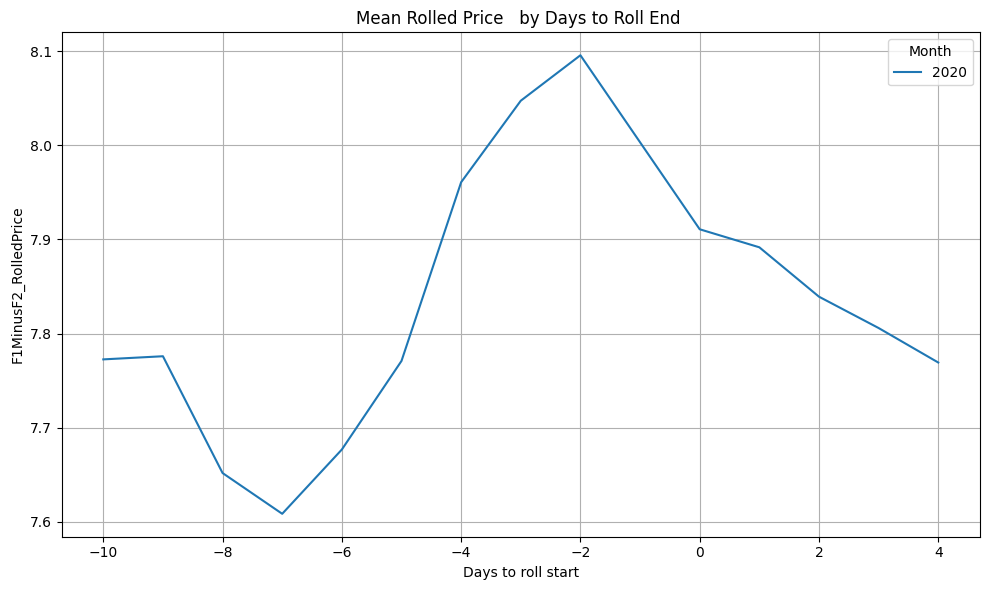

In [39]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# for m in ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
#        '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12']:
y=2020   
s= dataset[dataset['year']==y].groupby('days_to_next_roll_end')['F1MinusF2_RolledPrice'].mean()
pivot_index = 4
new_index = s.index.to_series().apply(
    lambda i: 0 if i == pivot_index else  -(i - pivot_index) if i < pivot_index else -(i - pivot_index)
)
s.index = new_index
s=s[s.index>=-10]
# subset = df[df['month'] == m]
# spread_change_by_day = subset.groupby('days_to_current_roll_end')['current_roll_end_F1MinusF2_RolledPrice_change'].mean()
s.plot(label=y)

# plt.gca().invert_xaxis()  # Largest days on the left
plt.ylabel('F1MinusF2_RolledPrice')
plt.xlabel('Days to roll start')
plt.title('Mean Rolled Price   by Days to Roll End ')
plt.legend(title='Month')
plt.grid(True)
plt.tight_layout()
plt.show()

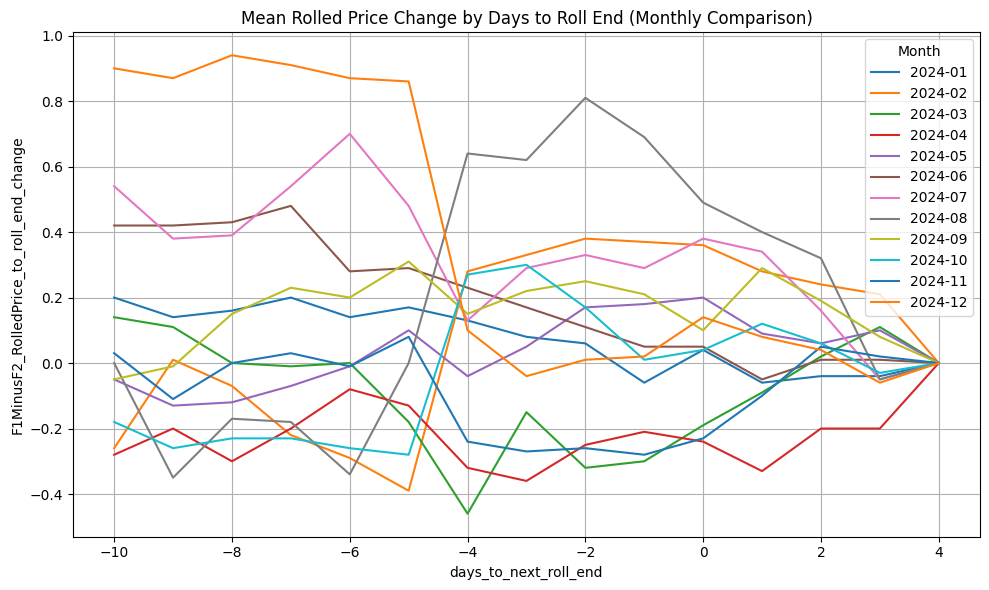

In [40]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for m in ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
       '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12']:
    
    s= dataset[dataset['month']==m].groupby('days_to_next_roll_end')['F1MinusF2_RolledPrice_to_roll_end_change'].mean()
    pivot_index = 4
    new_index = s.index.to_series().apply(
        lambda i: 0 if i == pivot_index else  -(i - pivot_index) if i < pivot_index else -(i - pivot_index)
    )
    s.index = new_index
    s=s[s.index>=-10]
    # subset = df[df['month'] == m]
    # spread_change_by_day = subset.groupby('days_to_current_roll_end')['current_roll_end_F1MinusF2_RolledPrice_change'].mean()
    s.plot(label=m)

# plt.gca().invert_xaxis()  # Largest days on the left
plt.ylabel('F1MinusF2_RolledPrice_to_roll_end_change')
plt.xlabel('days_to_next_roll_end')
plt.title('Mean Rolled Price Change by Days to Roll End (Monthly Comparison)')
plt.legend(title='Month')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
dataset['month']=='2025-06'

0       False
1       False
2       False
3       False
4       False
        ...  
3895     True
3896    False
3897    False
3898    False
3899    False
Name: month, Length: 3900, dtype: bool

In [42]:
dataset[dataset['month']=='2025-05'][[ 'tradeDate',
                                      'days_to_next_roll_end',
                                       'current_roll_start_date',
                                    'current_roll_end_date',
                                    'F1MinusF2_RolledPrice',
                                     'current_roll_end_date_F1MinusF2_RolledPrice',
                                      'next_roll_end_date_F1MinusF2_RolledPrice'
                                    ]]

,tradeDate,days_to_next_roll_end,current_roll_start_date,current_roll_end_date,F1MinusF2_RolledPrice,current_roll_end_date_F1MinusF2_RolledPrice,next_roll_end_date_F1MinusF2_RolledPrice
3855,2025-05-01,8,2025-05-07,2025-05-13,0.71,0.57,1.5
3856,2025-05-02,7,2025-05-07,2025-05-13,0.61,0.57,1.5
3857,2025-05-05,6,2025-05-07,2025-05-13,0.53,0.57,1.5
3858,2025-05-06,5,2025-05-07,2025-05-13,0.56,0.57,1.5
3859,2025-05-07,4,2025-05-07,2025-05-13,0.52,0.57,1.5
3860,2025-05-08,3,2025-05-07,2025-05-13,0.54,0.57,1.5
3861,2025-05-09,2,2025-05-07,2025-05-13,0.59,0.57,1.5
3862,2025-05-12,1,2025-05-07,2025-05-13,0.54,0.57,1.5
3863,2025-05-13,0,2025-05-07,2025-05-13,0.57,0.57,1.5
3864,2025-05-14,20,2025-05-07,2025-05-13,0.62,0.57,1.5


In [43]:
dataset['current_roll_end_F1MinusF2_RolledPrice_change'] = (dataset['current_roll_end_date_F1MinusF2_RolledPrice'] - 
dataset['F1MinusF2_RolledPrice'])

In [44]:
# within roll window spread price dynamic

In [45]:
# df=dataset[(dataset['tradeDate']>= dataset['current_roll_start_date'] + datetime.timedelta(-10)
           
#            ) & (dataset['tradeDate'] <=  dataset['current_roll_end_date'] )]

In [46]:
df=dataset[(dataset['bdays_to_next_roll_start']<=10 ) & (dataset['tradeDate'] <=  dataset['current_roll_end_date'] )]

KeyError: 'bdays_to_next_roll_start'

In [ ]:
df.groupby('days_to_current_roll_end')['current_roll_end_F1MinusF2_RolledPrice_change'].mean().plot()
plt.ylabel('current_roll_end_F1MinusF2_RolledPrice_change')

In [ ]:
df['tradeDate'].min(),df['tradeDate'].max()

In [ ]:
df['year'] = df['tradeDate'].apply(lambda d: d.year)


In [ ]:
df.groupby('days_to_current_roll_end')['current_roll_end_F1MinusF2_RolledPrice_change'].mean().plot()
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.ylabel('current_roll_end_F1MinusF2_RolledPrice_change')
plt.xlabel('days_to_current_roll_end')
plt.title('Mean Rolled Price Change by Days to Roll End')
plt.grid(True)
plt.show()

In [ ]:
df['month'].unique()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for m in ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
       '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12']:
    subset = df[df['month'] == m]
    spread_change_by_day = subset.groupby('days_to_current_roll_end')['current_roll_end_F1MinusF2_RolledPrice_change'].mean()
    spread_change_by_day.plot(label=m)

plt.gca().invert_xaxis()  # Largest days on the left
plt.ylabel('current_roll_end_F1MinusF2_RolledPrice_change')
plt.xlabel('days_to_current_roll_end')
plt.title('Mean Rolled Price Change by Days to Roll End (Monthly Comparison)')
plt.legend(title='Month')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
y=2021
df[df['year']==y].groupby('days_to_current_roll_end')['current_roll_end_F1MinusF2_RolledPrice_change'].mean().plot()
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.ylabel('current_roll_end_F1MinusF2_RolledPrice_change')
plt.xlabel('days_to_current_roll_end')
plt.title(f'Mean Rolled Price Change by Days to Roll End -- {y}')
plt.grid(True)
plt.show()

In [ ]:
df[df['days_to_current_roll_end']==5][[
    'tradeDate',
     'current_roll_start_date',
 'current_roll_end_date',
]].tail(1).T